<a href="https://colab.research.google.com/github/moaaztaha/Comparing-BLEU-scores-with-and-without-Arabert-preprocessing/blob/main/Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os

In [1]:
!git clone https://github.com/aub-mind/arabert
!git clone https://github.com/moaaztaha/Comparing-BLEU-scores-with-and-without-Arabert-preprocessing
os.system("mv  -v /content/Comparing-BLEU-scores-with-and-without-Arabert-preprocessing/* .")
!pip install -r requirements.txt

Cloning into 'arabert'...
remote: Enumerating objects: 544, done.
remote: Counting objects: 100% (330/330), done.
remote: Compressing objects: 100% (237/237), done.
remote: Total 544 (delta 175), reused 237 (delta 87), pack-reused 214
Receiving objects: 100% (544/544), 9.15 MiB | 12.77 MiB/s, done.
Resolving deltas: 100% (298/298), done.
Cloning into 'Comparing-BLEU-scores-with-and-without-Arabert-preprocessing'...
remote: Enumerating objects: 221, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (215/215), done.
remote: Total 221 (delta 3), reused 221 (delta 3), pack-reused 0
Receiving objects: 100% (221/221), 33.49 MiB | 25.35 MiB/s, done.
Resolving deltas: 100% (3/3), done.
/bin/bash: -c: line 0: syntax error near unexpected token `"mv  -v /content/Comparing-BLEU-scores-with-and-without-Arabert-preprocessing/* ."'
/bin/bash: -c: line 0: `os.system("mv  -v /content/Comparing-BLEU-scores-with-and-without-Arabert-preprocessing/* .")'


In [10]:
# Modules
import ipywidgets as widgets
from ipywidgets import interact_manual
import matplotlib.pyplot as plt
import pandas as pd

# needed to use matplotlib with jupyter widgets
%matplotlib notebook

from IPython.display import display, clear_output
import warnings
warnings.filterwarnings("ignore")

from utils import calculate_scores
%matplotlib inline

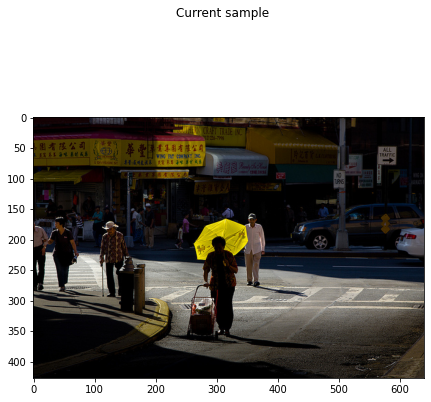

In [11]:
# Create the widgets
left = widgets.Button(description='Left')
right = widgets.Button(description='Right')
out = widgets.Output()

# get the file names
DATA_PATH = 'images_200/'
full_df = pd.read_json('results_comparison_200.json')

# Setting the first and last indexs
i=0 # starting index
i_max = full_df.shape[0] # ending index


with out:
    clear_output()
    display(full_df.iloc[i:i+1].drop('file_name', axis=1))
    display(calculate_scores(full_df.iloc[i]))
# Plot the first picture
img = plt.imread(f'{DATA_PATH}/{full_df.iloc[i, 0]}')
fig, ax = plt.subplots(1, figsize=(7, 7))
ax = plt.imshow(img)
plt.suptitle("Current sample")
plt.show()

# plots the next image
def plot_next(*args):
    global i
    i += 1
    # stop
    if i >= i_max: 
        print("Done")
        return

    
    # get next image index
    img = plt.imread(f'{DATA_PATH}/{full_df.iloc[i, 0]}')
    ax.set_data(img)
    plt.show()
    plt.title(f"image: {full_df.iloc[i, 0]}")
    with out:
        clear_output()
        display(full_df.iloc[i:i+1].drop('file_name', axis=1))
        display(calculate_scores(full_df.iloc[i]))

def plot_previous(*args):
    global i
    i -= 1
    # stop
    if i < 0: 
        print("Done")
        return

    
    
    # get next image index
    img = plt.imread(f'{DATA_PATH}/{full_df.iloc[i, 0]}')
    ax.set_data(img)
    plt.show()
    plt.title(f"image: {full_df.iloc[i, 0]}")

    with out:
        clear_output()
        display(full_df.iloc[i:i+1].drop('file_name', axis=1))
        display(calculate_scores(full_df.iloc[i]))
    
    
# attaching the buttons to their callback functions         
right.on_click(plot_next)
left.on_click(plot_previous)

# showing the widgets
vb1 = widgets.VBox([right, left])
vb2 = widgets.VBox([out])
widgets.HBox([vb1, vb2])